![An image](https://www.fee.unicamp.br/wp-content/uploads/2021/03/feec_2logo_feec_184x73.png)

#Projeto 1 - Análise e Síntese de Sinais de Áudio

EG940 (A) - Prof. Dr. Bruno Sanches Masiero
```
Aluno: Giordano Gatti Gomide - RA:216796
Aluno: Guilherme Rezende de Freitas Leitão - RA:236068
```

#Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

#Upload e tratamento dos dados

In [2]:
bateria, Fs = librosa.load('eg940 - bateria.wav')
tuba, Fs = librosa.load('eg940 - tuba.wav')

print(Fs)
print(len(bateria))
print(len(tuba))

T = np.linspace(0, len(tuba)/Fs, len(tuba))

22050
286650
286650


In [3]:
Audio(data = bateria, rate = Fs)

In [4]:
Audio(data = tuba, rate = Fs)

#Tempo

Text(0.5, 0, 'Tempo (s)')

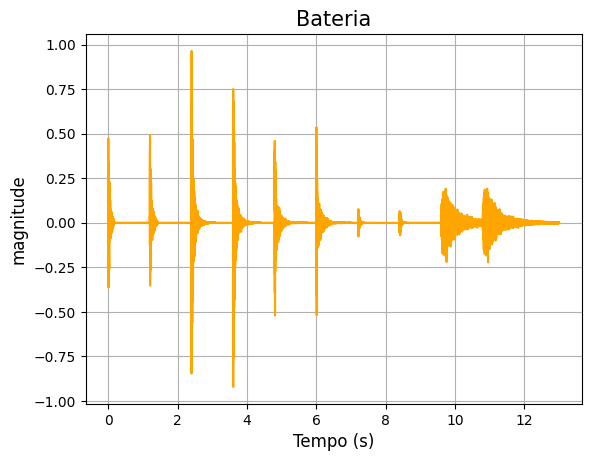

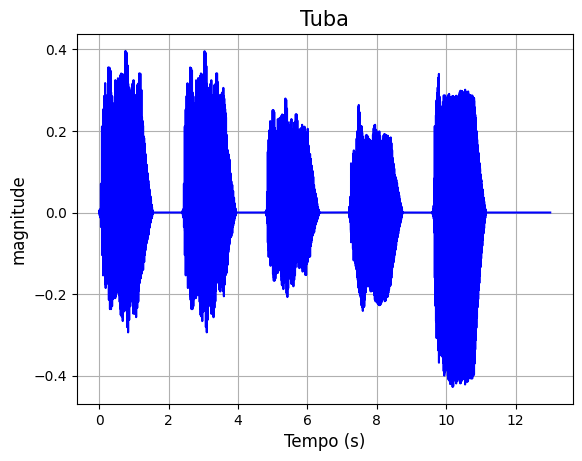

In [5]:
plt.figure()
plt.plot(T, bateria, color = 'orange')
plt.title('Bateria', fontsize=15)
plt.grid()
plt.ylabel('magnitude', fontsize=12)
plt.xlabel('Tempo (s)', fontsize=12)

plt.figure()
plt.title('Tuba', fontsize=15)
plt.plot(T, tuba, color = 'blue')
plt.grid()
plt.ylabel('magnitude', fontsize=12)
plt.xlabel('Tempo (s)', fontsize=12)

#Frequencia

In [6]:
def espectro(y, fs): #será utilizado todas as vezes que fomos montar o espectro de frequências de um sinal
    #Resposta em frequência:
    Y = (np.absolute(np.fft.fft(y)))[0:round(len(y)/2)]

    #Calcula o módulo da transformada e seleciona as frequências positivas apenas.
    Y = (np.absolute(np.fft.fft(y)))[0:round(len(y)/2)]
    #frequencias avaliadas no sinal
    w = np.linspace(0,fs/2,Y.size)

    #exibe o grafico do espectro
    plt.figure()
    plt.plot(w,Y/np.max(Y))
    plt.xlabel('Frequência (Hz)', fontsize=12)
    plt.ylabel('amplitude', fontsize=12)
    plt.grid(True)
    plt.xscale("log")
    plt.xlim(10,fs)
    plt.title("Espectro de frequências do sinal", fontsize=15)
    plt.show()
    return

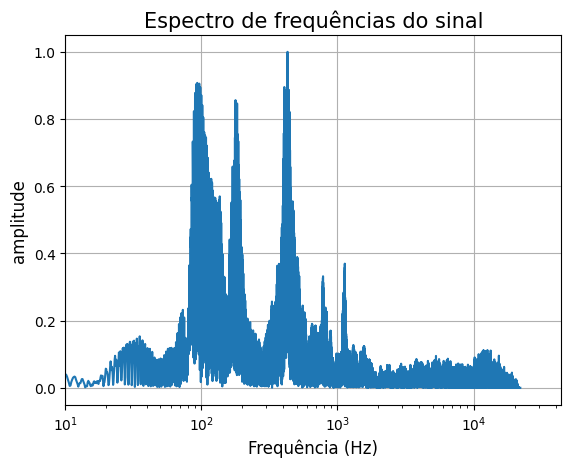

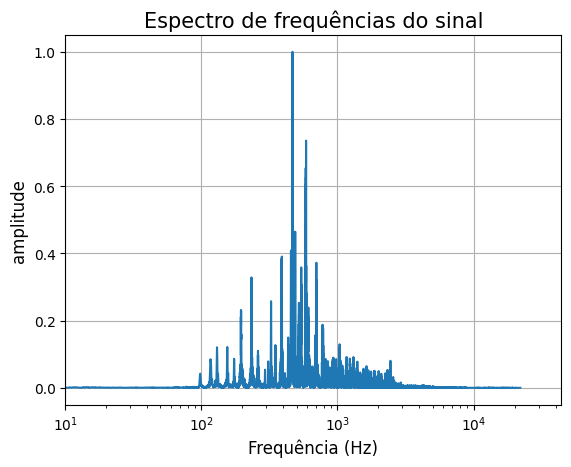

In [7]:
espectro(bateria, Fs*2)
espectro(tuba, Fs*2)

#Espectrograma

In [8]:
frame_size = 1024
hop_len = 512
def spectrograma(input, Fs):
  spectrograma = librosa.stft(input, n_fft = frame_size, hop_length = hop_len, win_length=frame_size)
  spectrograma = np.abs(spectrograma)
  print(spectrograma.shape)
  librosa.display.specshow(librosa.amplitude_to_db(spectrograma, ref=np.max), y_axis='log', x_axis='time', sr=Fs)

(513, 560)


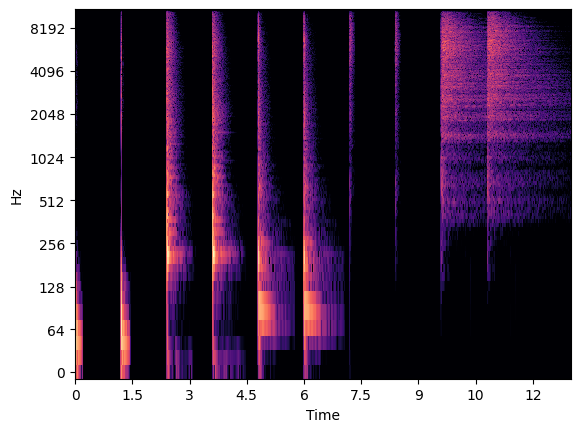

In [9]:
spectrograma(bateria, Fs)

(513, 560)


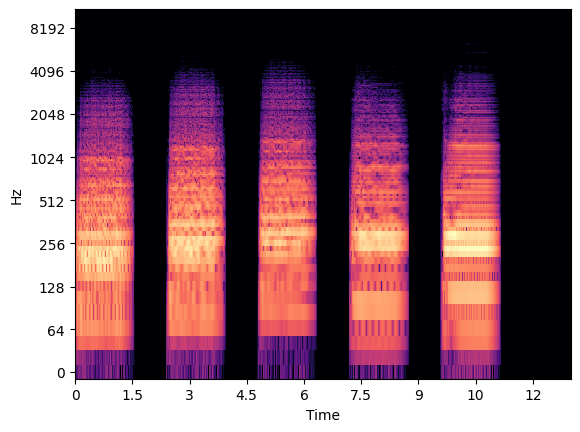

In [10]:
spectrograma(tuba, Fs)

#Envoltória

In [11]:
def rms(_x):
  return np.sqrt(np.mean(_x**2))

def max(_x):
  return np.max(np.abs(_x))

def env(x, frame_len, func=rms):
  i = 0
  e = []
  while (i+1)*frame_len < len(x):
    rms_local = func(x[i*frame_len : (i+1)*frame_len])
    e.append(rms_local)
    i += 1

  e = np.array(e)
  return e

In [12]:
er_bateria = env(bateria, frame_size, rms)
em_bateria = env(bateria, frame_size, max)

er_tuba = env(tuba, frame_size, rms)
em_tuba = env(tuba, frame_size, max)

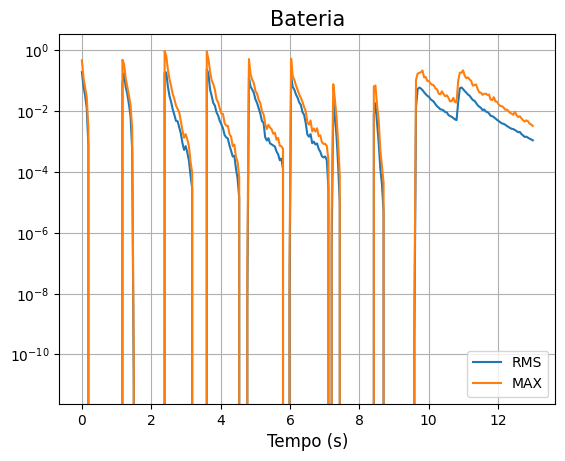

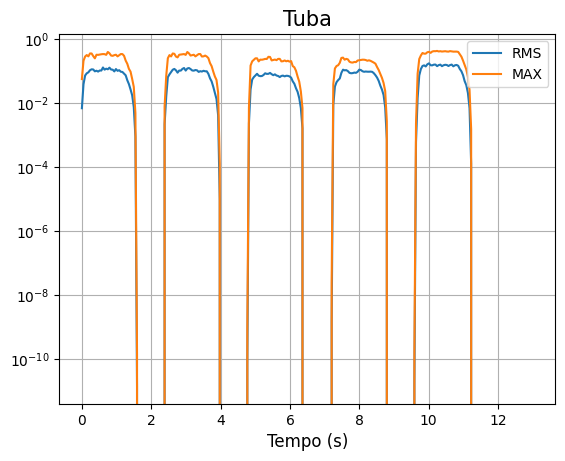

In [13]:
te = np.linspace(0, len(bateria)/Fs, len(er_bateria))

plt.figure()
plt.title('Bateria', fontsize=15)
plt.plot(te, er_bateria, label='RMS')
plt.plot(te, em_bateria, label='MAX')
plt.grid()
plt.legend()
plt.xlabel('Tempo (s)', fontsize=12)
plt.semilogy()
plt.show()

te = np.linspace(0, len(tuba)/Fs, len(er_tuba))
plt.figure()
plt.title('Tuba', fontsize=15)
plt.plot(te, er_tuba, label='RMS')
plt.plot(te, em_tuba, label='MAX')
plt.grid()
plt.legend()
plt.xlabel('Tempo (s)', fontsize=12)
plt.semilogy()
plt.show()

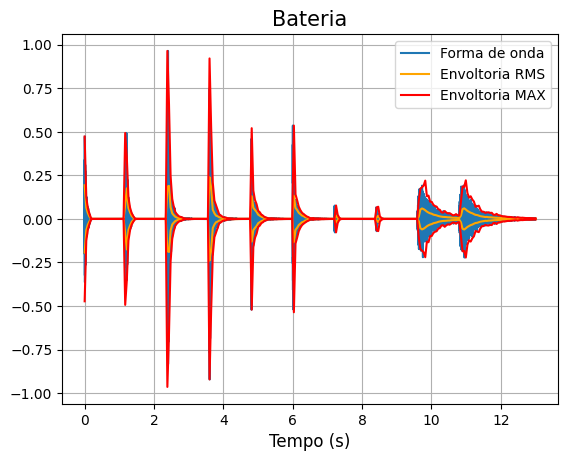

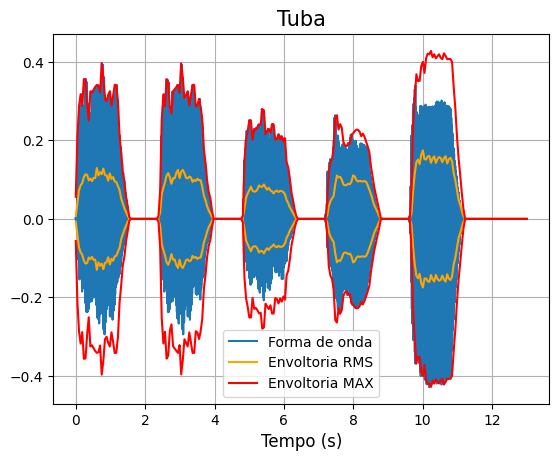

In [14]:
plt.figure()
plt.title('Bateria', fontsize=15)
plt.plot(T,bateria, label='Forma de onda')
plt.plot(te, er_bateria, color='orange', label='Envoltoria RMS')
plt.plot(te, -er_bateria, color='orange')
plt.plot(te, em_bateria, color='red', label='Envoltoria MAX')
plt.plot(te, -em_bateria, color='red')
plt.grid()
plt.xlabel('Tempo (s)', fontsize=12)
plt.legend()
plt.show()

plt.figure()
plt.title('Tuba', fontsize=15)
plt.plot(T,tuba, label='Forma de onda')
plt.plot(te, er_tuba, color='orange', label='Envoltoria RMS')
plt.plot(te, -er_tuba, color='orange')
plt.plot(te, em_tuba, color='red', label='Envoltoria MAX')
plt.plot(te, -em_tuba, color='red')
plt.grid()
plt.xlabel('Tempo (s)', fontsize=12)
plt.legend()
plt.show()

#Centroide

In [22]:
centroid_bateria = librosa.feature.spectral_centroid(y = bateria, sr=Fs)
centroid_tuba = librosa.feature.spectral_centroid(y = tuba, sr=Fs)

Text(0.5, 0, 'tempo (s)')

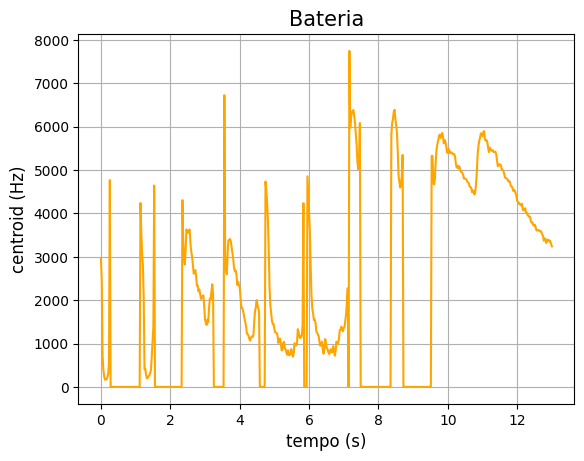

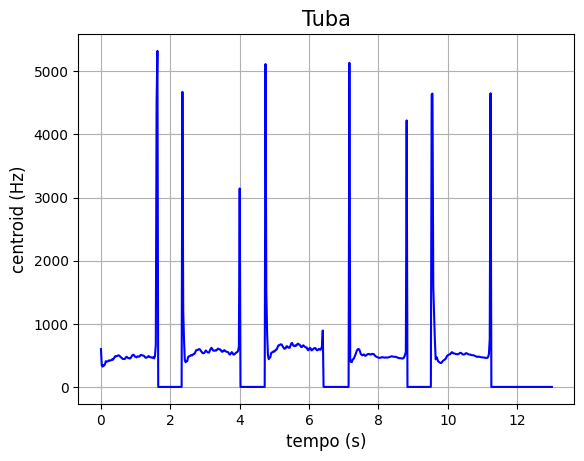

In [23]:
t_feature = np.linspace(0, len(bateria)/Fs, len(centroid_bateria[0]))

plt.figure()
plt.plot(t_feature, centroid_bateria[0], color = 'orange')
plt.title('Bateria', fontsize=15)
plt.grid()
plt.ylabel('centroid (Hz)', fontsize=12)
plt.xlabel('tempo (s)', fontsize=12)

plt.figure()
plt.title('Tuba', fontsize=15)
plt.plot(t_feature, centroid_tuba[0], color = 'blue')
plt.grid()
plt.ylabel('centroid (Hz)', fontsize=12)
plt.xlabel('tempo (s)', fontsize=12)

# Spectral flatness

In [25]:
SpFl_bateria = librosa.feature.spectral_flatness(y = bateria, n_fft=frame_size, hop_length=hop_len)
SpFl_tuba = librosa.feature.spectral_flatness(y = tuba, n_fft=frame_size, hop_length=hop_len)

Text(0.5, 0, 'tempo (s)')

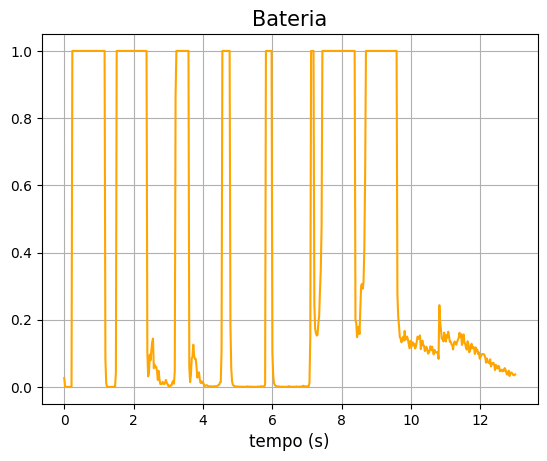

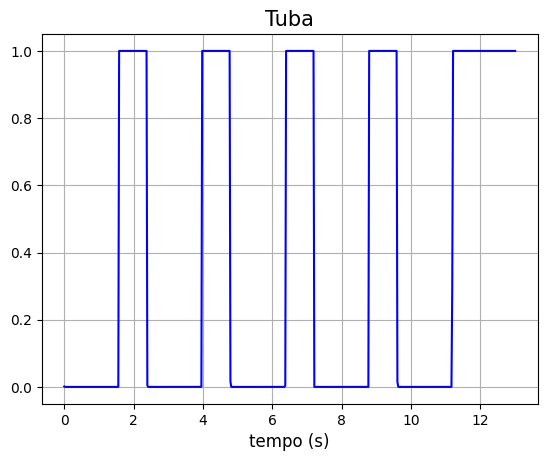

In [26]:
plt.figure()
plt.plot(t_feature, SpFl_bateria[0], color = 'orange')
plt.title('Bateria', fontsize=15)
plt.grid()
plt.xlabel('tempo (s)', fontsize=12)

plt.figure()
plt.title('Tuba', fontsize=15)
plt.plot(t_feature, SpFl_tuba[0], color = 'blue')
plt.grid()
plt.xlabel('tempo (s)', fontsize=12)

#Spectral rolloff

In [28]:
SpRo_bateria = librosa.feature.spectral_rolloff(y=bateria, n_fft=frame_size, hop_length=hop_len)
SpRo_tuba = librosa.feature.spectral_rolloff(y=tuba, n_fft=frame_size, hop_length=hop_len)

Text(0.5, 0, 'tempo (s)')

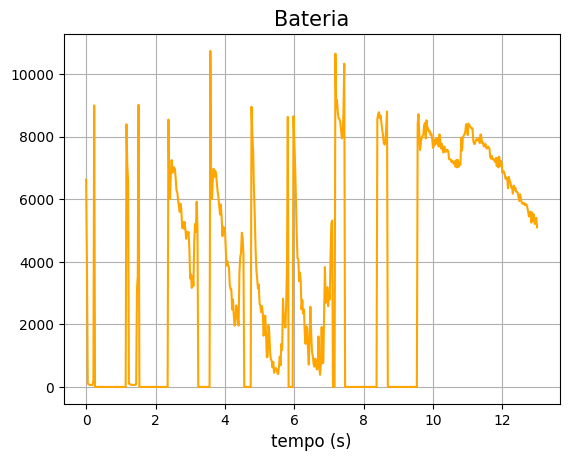

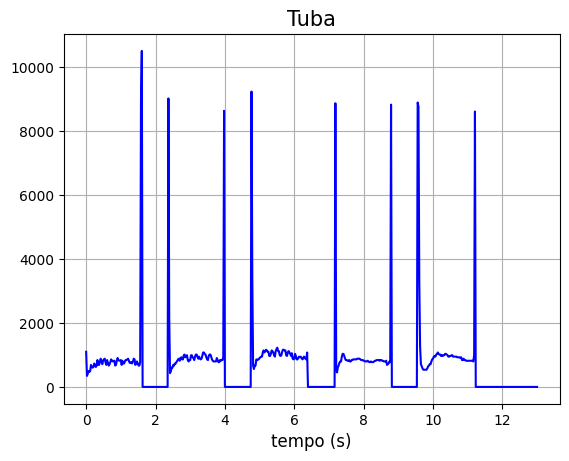

In [29]:
plt.figure()
plt.plot(t_feature, SpRo_bateria[0], color = 'orange')
plt.title('Bateria', fontsize=15)
plt.grid()
plt.xlabel('tempo [s]', fontsize=12)

plt.figure()
plt.title('Tuba', fontsize=15)
plt.plot(t_feature, SpRo_tuba[0], color = 'blue')
plt.grid()
plt.xlabel('tempo [s]', fontsize=12)

#zero-crossing rate

In [30]:
ZCR_bateria = librosa.feature.zero_crossing_rate(y=bateria, frame_length=frame_size, hop_length=hop_len)
ZCR_tuba = librosa.feature.zero_crossing_rate(y=tuba, frame_length=frame_size, hop_length=hop_len)

Text(0.5, 0, 'Tempo [s]')

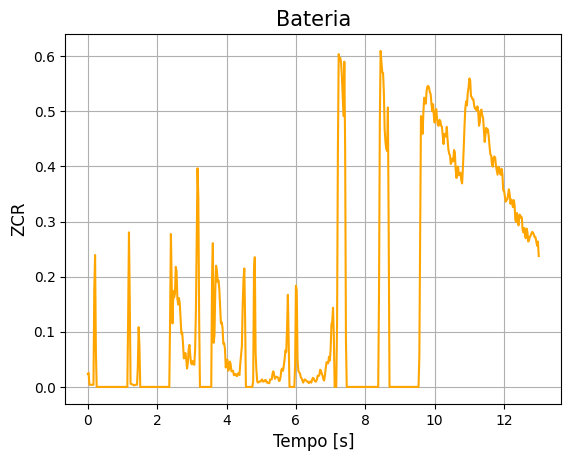

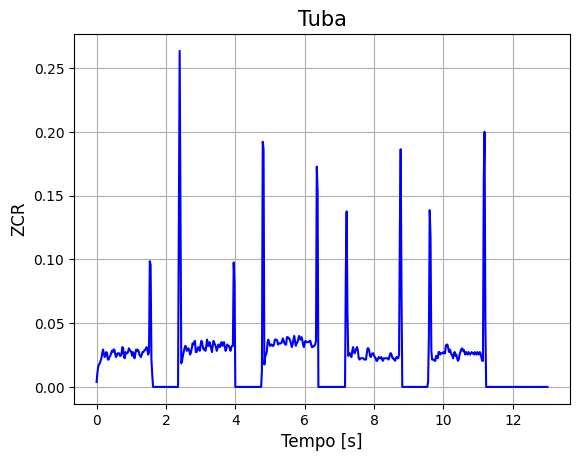

In [33]:
plt.figure()
plt.plot(t_feature, ZCR_bateria[0], color = 'orange')
plt.title('Bateria', fontsize=15)
plt.grid()
plt.ylabel('ZCR', fontsize=12)
plt.xlabel('Tempo [s]', fontsize=12)

plt.figure()
plt.title('Tuba', fontsize=15)
plt.plot(t_feature, ZCR_tuba[0], color = 'blue')
plt.grid()
plt.ylabel('ZCR', fontsize=12)
plt.xlabel('Tempo [s]', fontsize=12)